# Sprint 3

\+ Project code: [portef](https://github.com/CSC370-Project/portef)

![ERD.jpg](Extras/ERD.jpg)

## 1. Advanced Conceptual Design

1. [x] **Completeness**: Ensuring all necessary information and relationships for the system requirements are captured in the ERD.

2. [x] **Correctness**: The ERD accurately represents the intended real-world relationships and constraints.

3. [x] **Minimality**: Eliminating redundant attributes and relationships to ensure no unnecessary repetition.

4. [x] **Expressiveness**: The ERD should be detailed enough to convey all essential information and relationships clearly.

5. [x] **Readability**: The ERD should be easy to read and understand, with a logical and organized structure.

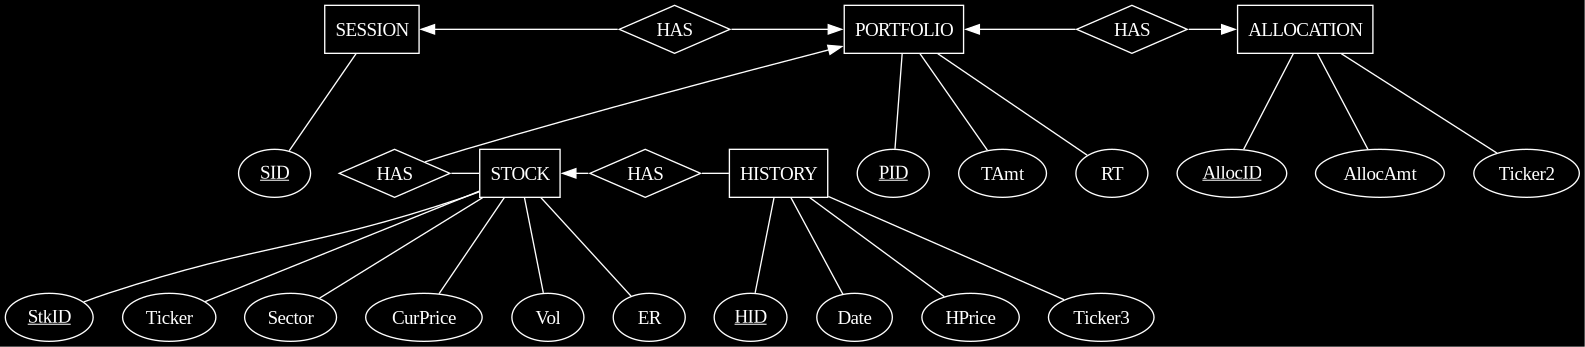

In [2]:
# Create ERD

from graphviz import Digraph

# Create a new directed graph
dot1 = Digraph(comment='ERD2')

# Set graph attributes for a black background and white nodes and edges
dot1.attr(bgcolor='black')
dot1.attr('node', color='white', fontcolor='white', style='filled', fillcolor='black')
dot1.attr('edge', color='white')
dot1.attr('graph', ranksep='1', nodesep='0.3')  # Reduced nodesep

# Add main entity nodes with shortened names
dot1.node('SSN', 'SESSION', shape='rectangle')
dot1.node('S', 'STOCK', shape='rectangle')
dot1.node('P', 'PORTFOLIO', shape='rectangle')
dot1.node('A', 'ALLOCATION', shape='rectangle')
dot1.node('H', 'HISTORY', shape='rectangle')

# Add relationship nodes
dot1.node('H1', 'HAS', shape='diamond')
dot1.node('H2', 'HAS', shape='diamond')
dot1.node('H3', 'HAS', shape='diamond')
dot1.node('H4', 'HAS', shape='diamond')

# Add subgraph for organizing nodes horizontally
with dot1.subgraph() as s:
    s.attr(rank='same')
    s.node('SSN')
    s.node('P')
    s.node('A')
    s.node('H1')
    s.node('H3')

with dot1.subgraph() as s2:
    s2.attr(rank='same')
    s2.node('S')
    s2.node('H')
    s2.node('H2')
    s2.node('H4')

# Add relationship edges
dot1.edge('SSN', 'H1', dir='back')
dot1.edge('H1', 'P')

dot1.edge('P', 'H2', dir='back')
dot1.edge('H2', 'S', arrowhead='none')

dot1.edge('P', 'H3', dir='back')
dot1.edge('H3', 'A')

dot1.edge('S', 'H4', dir='back')
dot1.edge('H4', 'H', arrowhead='none')

# Add attribute edges (separate nodes for each attribute)
# Session
dot1.node('SID', '<<u>SID</u>>', shape='ellipse')
dot1.edge('SSN', 'SID', arrowhead='none')

# Stock
dot1.node('StkID', '<<u>StkID</u>>', shape='ellipse')
dot1.node('Ticker', 'Ticker', shape='ellipse')
dot1.node('Sector', 'Sector', shape='ellipse')
dot1.node('CurP', 'CurPrice', shape='ellipse')  # CurrentPrice
dot1.node('Vol', 'Vol', shape='ellipse')  # Volatility
dot1.node('ER', 'ER', shape='ellipse')  # ExpectedReturn
dot1.edge('S', 'StkID', arrowhead='none')
dot1.edge('S', 'Ticker', arrowhead='none')
dot1.edge('S', 'Sector', arrowhead='none')
dot1.edge('S', 'CurP', arrowhead='none')
dot1.edge('S', 'Vol', arrowhead='none')
dot1.edge('S', 'ER', arrowhead='none')

# Portfolio
dot1.node('PID', '<<u>PID</u>>', shape='ellipse')
dot1.node('TAmt', 'TAmt', shape='ellipse')  # TotalAmount
dot1.node('RT', 'RT', shape='ellipse')  # RiskTolerance
dot1.edge('P', 'PID', arrowhead='none')
dot1.edge('P', 'TAmt', arrowhead='none')
dot1.edge('P', 'RT', arrowhead='none')

# Allocation
dot1.node('AllocID', '<<u>AllocID</u>>', shape='ellipse')
## dot1.node('Ticker2', 'Ticker', shape='ellipse')  # StockID
dot1.node('AllocAmt', 'AllocAmt', shape='ellipse')  # AllocatedAmount
dot1.edge('A', 'AllocID', arrowhead='none')
dot1.edge('A', 'Ticker2', arrowhead='none')
dot1.edge('A', 'AllocAmt', arrowhead='none')

# Stock History
## dot1.node('Ticker3', 'Ticker', shape='ellipse')  # History
dot1.node('HID', '<<u>HID</u>>', shape='ellipse')  # HistStockID
dot1.node('Date', 'Date', shape='ellipse')
dot1.node('HPrice', 'HPrice', shape='ellipse')  # HistPrice
dot1.edge('H', 'HID', arrowhead='none')
dot1.edge('H', 'Ticker3', arrowhead='none')
dot1.edge('H', 'Date', arrowhead='none')
dot1.edge('H', 'HPrice', arrowhead='none')

# Render the graph
dot1.render('ERD2', format='png', cleanup=False)

# Display the graph inline in Jupyter Notebook (for Jupyter only)
from IPython.display import Image
Image(filename='ERD2.png')

## 2. ACID design


### Idea

- Try-except blocks around pymySQL execution statements (1) - (5),

### Implementation

- Broke down program into transactions based on program logic (see below)
- Facilitated by pymysql:
  - Within each try-except block (transaction):
  - `connection.start_transaction()`
    - Sql code...
  - `connection.commit()` at end of try block, or
  - `conneciton.rollback()` at end of except block

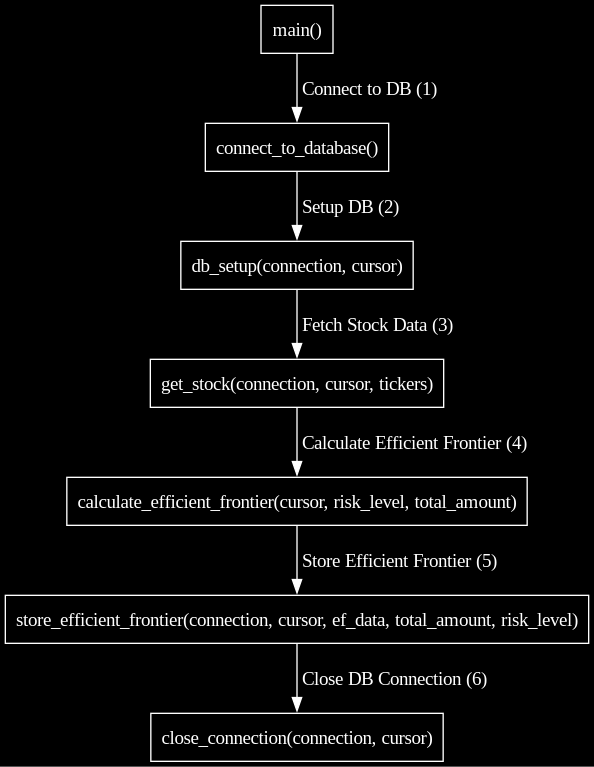

In [1]:
from graphviz import Digraph
from IPython.display import display, Image

# Create a new directed graph
dot = Digraph(comment='Program Logic')

# Set graph attributes for black background and white text/lines
dot.attr(bgcolor='black')
dot.attr('node', style='filled', fillcolor='black', fontcolor='white', color='white', shape='box')
dot.attr('edge', color='white', fontcolor='white')

# Define nodes
dot.node('A', 'main()')
dot.node('B', 'connect_to_database()')
dot.node('C', 'db_setup(connection, cursor)')
dot.node('D', 'get_stock(connection, cursor, tickers)')
dot.node('E', 'calculate_efficient_frontier(cursor, risk_level, total_amount)')
dot.node('F', 'store_efficient_frontier(connection, cursor, ef_data, total_amount, risk_level)')
dot.node('G', 'close_connection(connection, cursor)')

# Define edges
dot.edge('A', 'B', ' Connect to DB (1)')
dot.edge('B', 'C', ' Setup DB (2)')
dot.edge('C', 'D', ' Fetch Stock Data (3)')
dot.edge('D', 'E', ' Calculate Efficient Frontier (4)')
dot.edge('E', 'F', ' Store Efficient Frontier (5)')
dot.edge('F', 'G', ' Close DB Connection (6)')

# Render the graph to a file and display it
dot.render('program_logic', format='png')
display(Image(filename='program_logic.png'))



### Results

- **Atomicity:** Transactions either fully complete or rollback
- **Consistency:** 'Fresh' DB schema setup correctly before any data operations, preserving DB integrity
- **Isolation:** Transactions & lack of concurrency prevent intermediate states from being visible to other transactions
- **Durability:** MariaDB (assumed MySQL) logs by default, transactions with commit messages ensure changes in DB permanently saved even in event of system failure

## 3. Course level competencies

## Summary: Last week's goals

- Data analytics, L3: Use a variety of SQL constructs and indexes to produce readable, efficient, idiomatic queries
- Data modelling, L3: Apply advanced ERD constructs and normalisation methods to produce more natural schemata
- Back end engineering, L1: Create conditions to ensure relational databases exhibit ACID behaviour

### **Data analytics**

#### Previous goals

- Level 2 complete
  - (4) completed upon completion of EF
- Level 3 (arguably) complete, although program not finished yet:
  - No sub-queries
  - Program inherently indexed due to use of ID's
  - No iteration used directly in SQL
  - Code conforms to SQL conventions
  - Queries simple and efficient

#### Moving forwards

- Ensure program continues to conform to level 3
- Refine program according to level 4 (as covered in class)

### **Data Modelling**

#### Previous goals

- Level 3
  - (1) Inheritance does not seem appropriate since no given subclasses
  - (1) `History` table could be considered a weak entity
  - Remainder not yet covered

#### Moving Forwards

Still lots to do in level 3:
- Continue to work through & consider level 3 topics, such as
  - (3) Alternative normal forms
  - (4) Ternary relationships, relationship identifiers, composite attributes
- Include thoughts in next sprint on more conceptual topics such as
  - (2) Incongruity between conceptual/relational schemata
  - (5) Evaluation strengths & weaknesses of schema w conceptual framework
  - (6) Considering impact of NULL values & inheritance on functional dependencies

### **Back-end engineering**

#### Previous goals:

- Level 1 complete; Program conforms to ACID

#### Moving forwards:

- Level 2 may require adjusting the database to be usable by multiple people
- While this was considered in the design, it will have to be brought up with the prof or a TA considering we are working with local servers

#### Summary:

-  (Analytics, L4) Optimize SQL queries to map onto more efficient physical operators
-  (Modelling, L3) Apply advanced ERD constructs/normalization methods 
-  (Engineering, L2) Ensure DB can be used in concurrent, multi-user environment